In [1]:
import pandas as pd
import numpy as np
import gzip

In [2]:
images_path = "/home/hackerearth/Desktop/t-sne/train-images-idx3-ubyte.gz"
labels_path = "/home/hackerearth/Desktop/t-sne/train-labels-idx1-ubyte.gz"

In [3]:
with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

In [4]:
images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [7]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [8]:
# Subset first 20k data points to visualize
x_subset = images[0:20000]
y_subset = labels[0:20000]

print(np.unique(y_subset))

[0 1 2 3 4 5 6 7 8 9]


In [9]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 1.0650644302368164 seconds


In [10]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.29021329 0.1778743  0.06015076 0.04975864]


(<Figure size 576x576 with 1 Axes>,
 [Text(774.4497664228486, -689.6949155564104, '0'),
  Text(42.86381926001577, -1429.3643908431636, '1'),
  Text(1098.284332649446, 376.9753232976185, '2'),
  Text(329.27198606820394, -1111.4898090802412, '3'),
  Text(1266.970986825826, 295.46620083649935, '4'),
  Text(-1589.5573233914538, 61.86773393495565, '5'),
  Text(713.4727983675555, -65.68701122366873, '6'),
  Text(-1521.4109429508735, 335.6656253193176, '7'),
  Text(63.81768171702842, 1003.3250404640283, '8'),
  Text(-645.6906091272665, 1168.2384038968637, '9')])

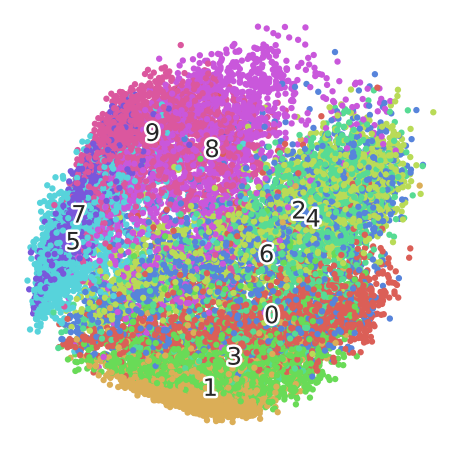

In [11]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output

In [12]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 1194.0222017765045 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(41.519543, 6.2158065, '0'),
  Text(16.503407, 61.117332, '1'),
  Text(13.98172, -39.081573, '2'),
  Text(23.601368, 24.037092, '3'),
  Text(31.923283, -32.924557, '4'),
  Text(-36.77939, 5.288479, '5'),
  Text(16.949478, -17.389828, '6'),
  Text(-59.46676, -11.188857, '7'),
  Text(-22.60891, -37.143707, '8'),
  Text(-34.67833, 39.370636, '9')])

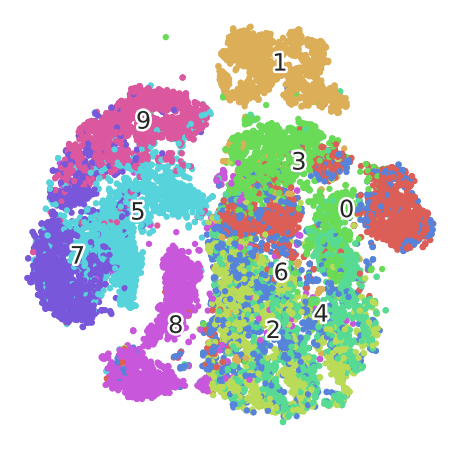

In [13]:
fashion_scatter(fashion_tsne, y_subset)

In [14]:
time_start = time.time()

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

print ('PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print ('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

PCA with 50 components done! Time elapsed: 2.634709596633911 seconds
Cumulative variance explained by 50 principal components: 0.8625050271157468


In [15]:
import time
time_start = time.time()


fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 191.75298357009888 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(5.6500206, 20.105331, '0'),
  Text(24.507805, 59.868713, '1'),
  Text(20.328249, -40.96463, '2'),
  Text(48.745003, 19.308275, '3'),
  Text(36.73047, -34.04841, '4'),
  Text(-36.12977, 3.0917203, '5'),
  Text(14.664459, -18.89917, '6'),
  Text(-60.758713, -16.422668, '7'),
  Text(-18.852734, -35.134792, '8'),
  Text(-40.80945, 42.55229, '9')])

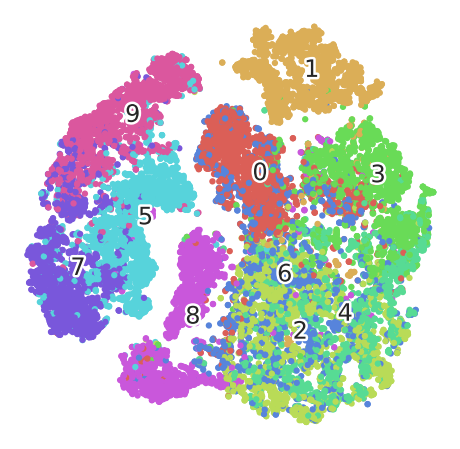

In [16]:
fashion_scatter(fashion_pca_tsne, y_subset)